In [67]:
import sys
import re
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

sys.path.append('../src')

import columnar as col

ROOT_PATH = '../'

plt.style.use('fivethirtyeight')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
df = pd.read_csv('../data/titanic/titanic.csv', index_col='PassengerId')

df.columns = [col.lower() for col in df.columns]
df['missing_age'] = df.age.isnull() * 1
df.age.fillna(df.age.mean(), inplace=True)
df.fillna('other', inplace=True)
df.drop(['ticket', 'name'], axis=1, inplace=True)
df['cabin_type'] = df.cabin.apply(lambda s: s[0])
df.sample(5).T


PassengerId,842,851,199,574,643
survived,0,0,1,1,0
pclass,2,3,3,3,3
sex,male,male,female,female,female
age,16.0,4.0,29.699118,29.699118,2.0
sibsp,0,4,0,0,3
parch,0,2,0,0,2
fare,10.5,31.275,7.75,7.75,27.9
cabin,other,other,other,other,other
embarked,S,S,Q,Q,S
missing_age,0,0,1,1,0


<AxesSubplot:xlabel='pclass'>

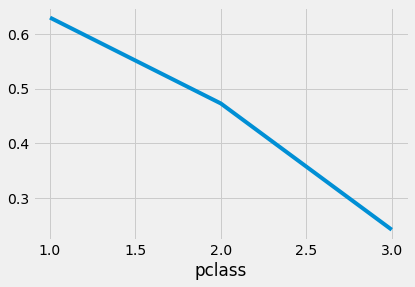

In [117]:
df.groupby('pclass').survived.mean().plot()

In [122]:
def _select_features(df: pd.DataFrame) -> dict[str, str]:   
    numericals = ['age', 'fare']
    target = 'survived'
    categoricals = [col for col in df.columns if col not in numericals + [target]]
    return dict(numericals=numericals, categoricals=categoricals, target=target)

_select_features(df)

{'numericals': ['age', 'fare'],
 'categoricals': ['pclass',
  'sex',
  'sibsp',
  'parch',
  'cabin',
  'embarked',
  'cabin_type'],
 'target': 'survived'}

In [106]:
df.cabin.apply(lambda s: s[0]).value_counts()

o    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin, dtype: int64

In [92]:
{col: df[col].nunique() for col in df.columns}

{'Survived': 2,
 'Pclass': 3,
 'Name': 891,
 'Sex': 2,
 'Age': 89,
 'SibSp': 7,
 'Parch': 7,
 'Ticket': 681,
 'Fare': 248,
 'Cabin': 148,
 'Embarked': 4,
 'gender': 2}

In [56]:
df = pd.read_csv('../data/mushrooms/mushrooms.csv')
df['class_ep'] = df['class'].map({'p': 0, 'e': 1})
df.columns = [col.replace('-', '_') for col in df.columns]
df.drop(['class'], axis=1, inplace=True)



In [25]:
df.head().T

,0,1,2,3,4
age,73,58,18,9,10
class_of_worker,Not in universe,Self-employed-not incorporated,Not in universe,Not in universe,Not in universe
industry_code,0,4,0,0,0
occupation_code,0,34,0,0,0
adjusted_gross_income,High school graduate,Some college but no degree,10th grade,Children,Children
education,0,0,0,0,0
wage_per_hour,Not in universe,Not in universe,High school,Not in universe,Not in universe
enrolled_in_edu_inst_last_wk,Widowed,Divorced,Never married,Never married,Never married
marital_status,Not in universe or children,Construction,Not in universe or children,Not in universe or children,Not in universe or children
major_industry_code,Not in universe,Precision production craft & repair,Not in universe,Not in universe,Not in universe


In [ ]:
loader = col.DataLoader(task='census_income', root=ROOT_PATH)
df = loader.load_data()
display(df.sample(5))